# (1) Load Dataset

In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cardio.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,age,gender,height,weight,bp_hi,bp_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,52,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,60,0,151,67.0,120,80,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62497,54,0,172,70.0,130,90,1,1,0,0,1,1
62498,58,0,165,80.0,150,80,1,1,0,0,1,1
62499,53,1,168,76.0,120,80,1,1,1,0,1,0
62500,61,0,163,72.0,135,80,1,2,0,0,0,1


# (2) Train Test Split

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['cardio'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Shape : {X_train.shape}")
print(f"Test Shape : {X_test.shape}")

Training Shape : (50001, 11)
Test Shape : (12501, 11)


# (3) Scalling

In [25]:
from sklearn.preprocessing import StandardScaler 
numeric_cols = ["age", "height", "weight", "bp_hi", "bp_lo"]

#StandardScaler()
scaler = StandardScaler()

#fit_transform()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Scaled X_train_scaled_data_sample :')
X_train_scaled

Scaled X_train_scaled_data_sample :


array([[-0.35815343, -0.73340109, -0.58684233, ..., -0.30755946,
        -0.2338705 , -2.01642194],
       [ 0.68085369, -0.73340109, -0.32133475, ..., -0.30755946,
        -0.2338705 ,  0.49592795],
       [-1.69401973, -0.73340109,  0.475188  , ..., -0.30755946,
        -0.2338705 ,  0.49592795],
       ...,
       [ 1.57143122, -0.73340109, -0.32133475, ..., -0.30755946,
        -0.2338705 , -2.01642194],
       [ 0.82928328, -0.73340109,  0.475188  , ..., -0.30755946,
        -0.2338705 , -2.01642194],
       [ 0.08713533, -0.73340109,  0.475188  , ..., -0.30755946,
        -0.2338705 ,  0.49592795]])

# (4) Model Training (Decision Tree)

In [27]:
# Default decision tree
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train_scaled, y_train)

# Predictions
y_train_pred = dt_default.predict(X_train_scaled)
y_test_pred = dt_default.predict(X_test_scaled)

# Probabilities for ROC-AUC
y_train_proba = dt_default.predict_proba(X_train_scaled)[:, 1]
y_test_proba = dt_default.predict_proba(X_test_scaled)[:, 1]


# (5) Accuracy

In [29]:
def print_metrics(y_true, y_pred, y_proba, dataset_name=""):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    
print_metrics(y_train, y_train_pred, y_train_proba, "Train")
print_metrics(y_test, y_test_pred, y_test_proba, "Test")



Train Results:
Accuracy: 0.9731
Precision: 0.9933
Recall: 0.9520

Test Results:
Accuracy: 0.6315
Precision: 0.6306
Recall: 0.6074


# (6) Confusion Matrix

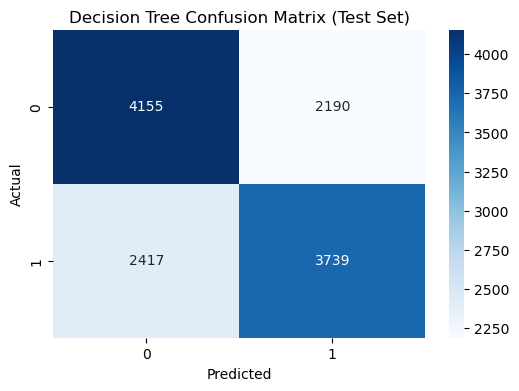

In [31]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix (Test Set)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# (7) Overfitting Check

In [33]:
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Gap (Overfitting): {train_acc - test_acc:.4f}")

# Interpretation
if train_acc - test_acc > 0.1:
    print("⚠️  Significant overfitting detected")
elif train_acc - test_acc > 0.05:
    print("⚠️  Mild overfitting")
else:
    print("✅ Good generalization")


Train Accuracy: 0.9731
Test Accuracy: 0.6315
Gap (Overfitting): 0.3416
⚠️  Significant overfitting detected
